In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
orgImg = cv2.imread('plate1.jpg')

In [4]:
print(orgImg.shape)

(552, 2048, 3)


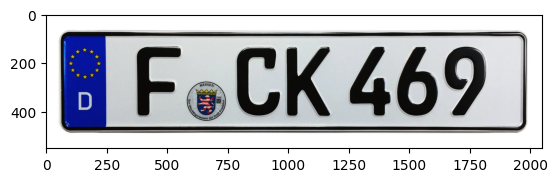

In [5]:
plt.imshow(cv2.cvtColor(orgImg, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def imgShow2(img1, img1Title, img1Color, img2, img2Title, img2Color):
    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(1, 2, 1)

    if (img1Color == 1):
        imgPlot = plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    else:
        imgPlot = plt.imshow(img1, cmap="gray")
    
    ax.set_title(img1Title)


    ax = fig.add_subplot(1, 2, 2)

    if (img2Color == 1):
        imgPlot = plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    else:
        imgPlot = plt.imshow(img2, cmap="gray")
    
    ax.set_title(img2Title)

(552, 2048)


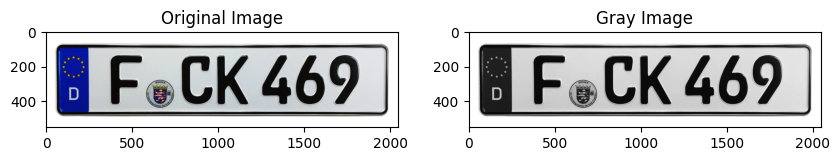

In [7]:
# Convert to gray scale
grayImg = cv2.cvtColor(orgImg, cv2.COLOR_BGR2GRAY)
print(grayImg.shape)
imgShow2(orgImg, "Original Image", 1, grayImg, "Gray Image", 0)

In [8]:
print(grayImg)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [9]:
import numpy as np
gray32Img = np.float32(grayImg)
print(gray32Img)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [10]:
blocksize = 2
ksize = 3
k = 0.5
harrisCornerR = cv2.cornerHarris(gray32Img, blocksize, ksize, k)
print(harrisCornerR)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
print(harrisCornerR.max())

0.0


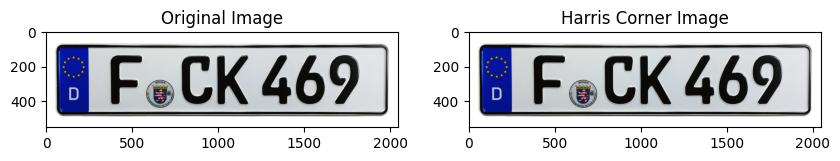

In [14]:
harrisCornerImg = orgImg.copy()
harrisCornerImg[harrisCornerR > harrisCornerR.max() / 100] = [0, 255, 0]
imgShow2(orgImg, "Original Image", 1, harrisCornerImg, "Harris Corner Image", 1)